<a href="https://colab.research.google.com/github/Mayank224472/Mayank_Yadav/blob/WhiteHat_Mayank_Applied_Tech/Whitehat_Mayank_Lesson29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 29: Capstone Class - Meteorite Landings 

### Teacher-Student Activities

Two classes ago, we learnt how to create a histogram. We also created a histogram for 10 different classes of meteorites. In this class, we will learn about chondrites and will compute the percentage of minimum ordinary chondrite type meteorites fallen on Earth.

Let's do a quick recap and start the class with **Activity 1: Conclusion** section.


---

#### Recap

Dataset Link (don't click on it):

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv


In [ ]:
# Below are the activities that have been covered in the previous class.
# 1. Import the necessary libraries for this class and create a DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

met_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')

# 2. Find the number of rows and columns in the DataFrame. 
print(met_df.shape)

# 3. Rows containing the year values less than 860 and greater than 2016.
correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]

# 4. Rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]

# 5. Rows containing the '0 reclat' and '0 reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]

# 6. Indices of the rows having missing mass values.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index

# 7. Missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass

# 8. Convert the 'year' values into integer type values.
correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')

(45716, 10)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


---

#### Meteorite Class-wise Histograms

The number of unique classes of meteorites present in the dataset.

In [ ]:
# Calculate the number of unique classes of meteorites.
len(correct_lat_long_df['recclass'].unique())

394

There are 394 different classes of meteorites. 

In [ ]:
# Count of the fall of the different classes of meteorites.
correct_lat_long_df['recclass'].value_counts()

L6              6529
H5              5590
H4              3324
H6              3231
L5              2725
                ... 
L3.3-3.5           1
L/LL5-6            1
H(?)4              1
L(LL)3.5-3.7       1
EH7-an             1
Name: recclass, Length: 394, dtype: int64

The `value_counts()` function returns a Pandas series.

In [ ]:
# Store the 'correct_lat_long_df['recclass'].value_counts()' Pandas series in a new variable.
met_class_counts = correct_lat_long_df['recclass'].value_counts()
met_class_counts

L6              6529
H5              5590
H4              3324
H6              3231
L5              2725
                ... 
L3.3-3.5           1
L/LL5-6            1
H(?)4              1
L(LL)3.5-3.7       1
EH7-an             1
Name: recclass, Length: 394, dtype: int64

Display the top 10 classes of the meteorites with the highest number of falls.

In [ ]:
# Display the top 10 most number of fallen meteorite classes.
met_class_counts[:10].index

Index(['L6', 'H5', 'H4', 'H6', 'L5', 'LL5', 'LL6', 'L4', 'H4/5', 'CM2'], dtype='object')

Create a histogram for the top ten most number of fallen class of meteorites to see if there is any kind of similarity in the pattern of their falls. Make sure that each histogram has exactly 50 bins.

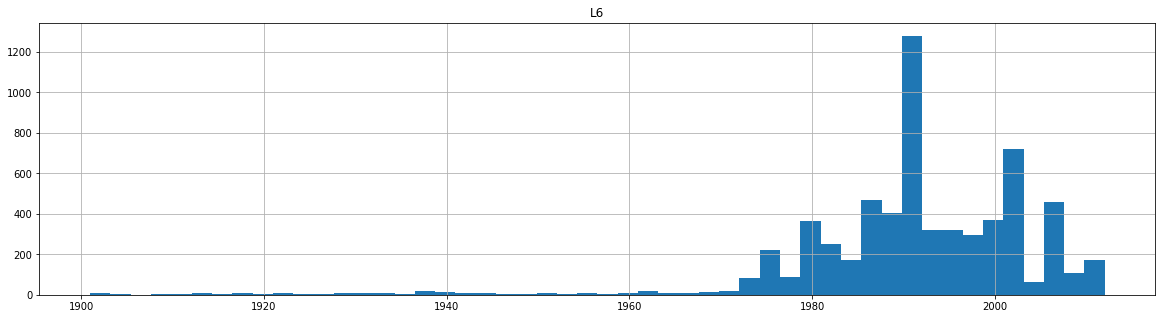

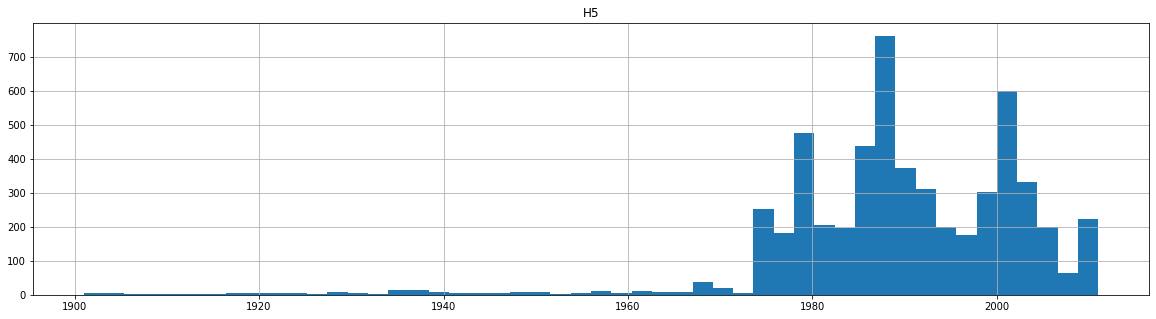

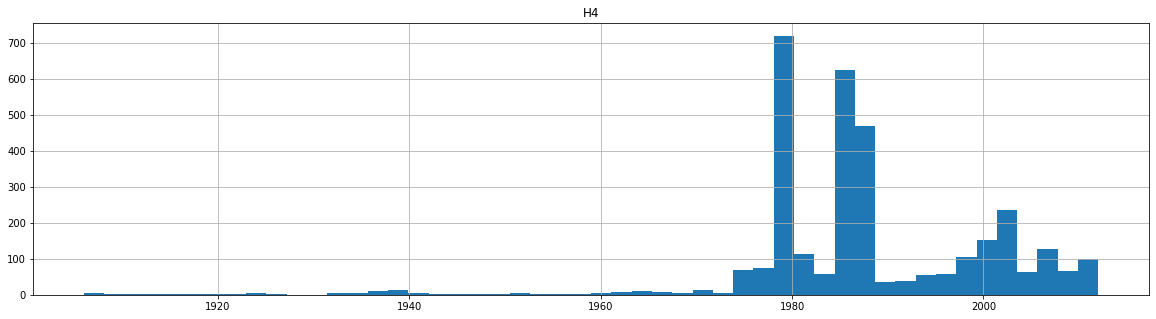

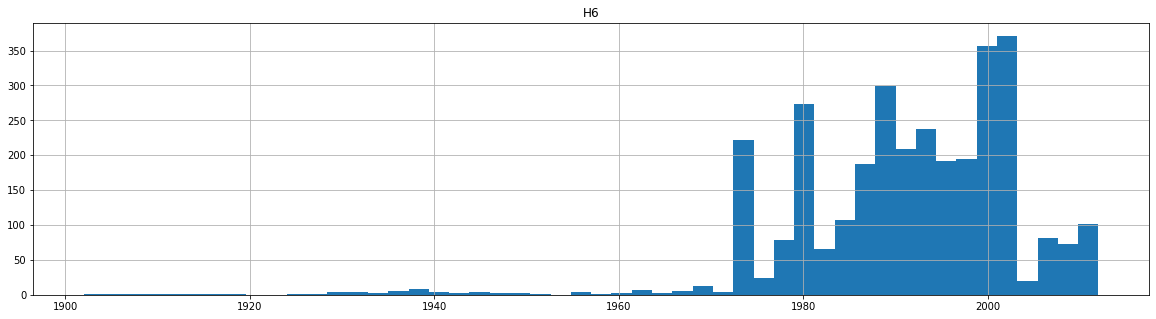

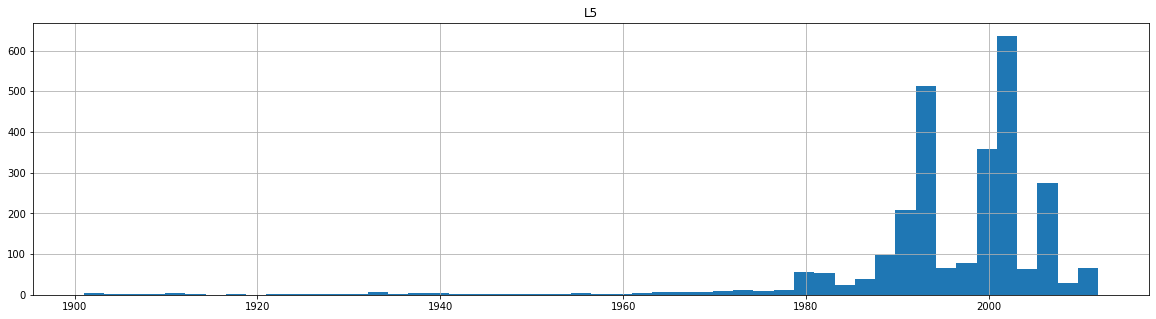

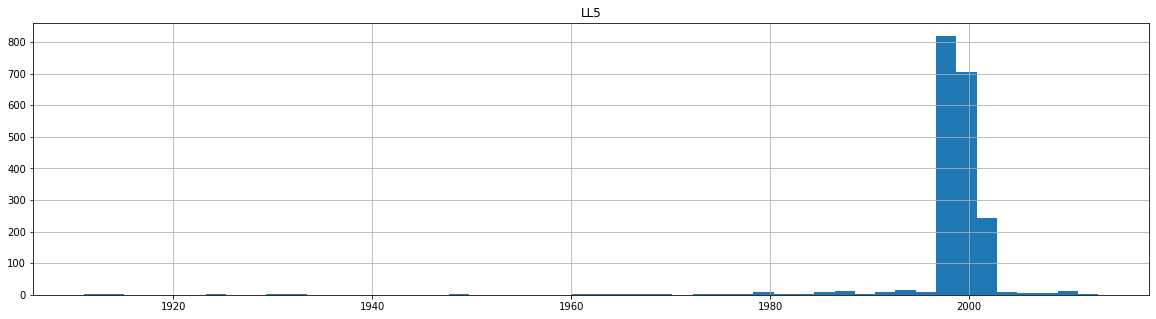

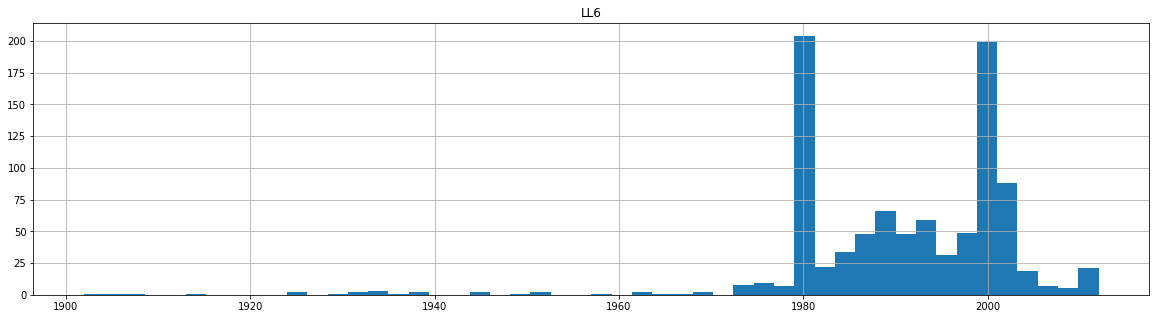

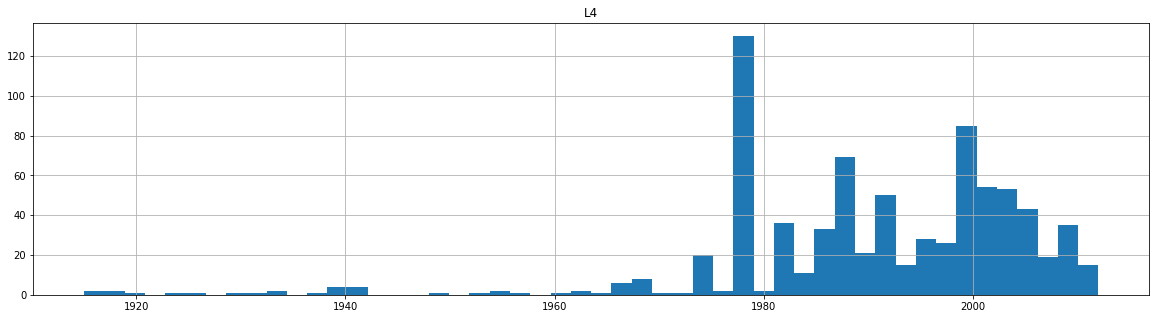

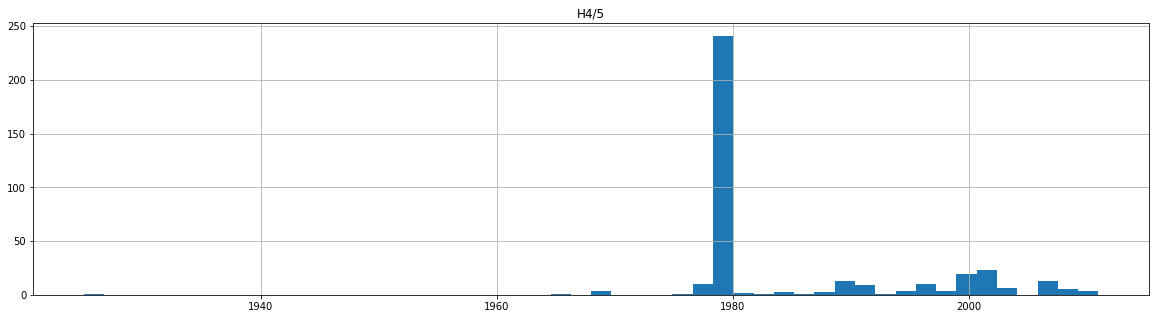

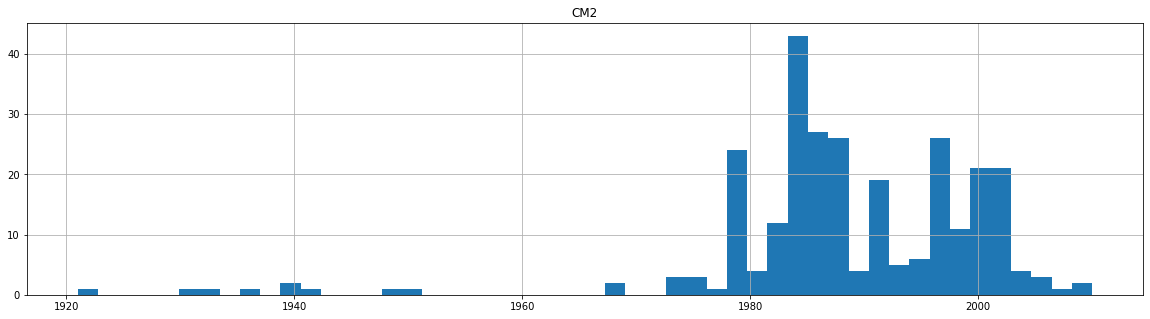

In [ ]:
# Plot the histograms for the top 10 most number of fallen meteorite classes using the 'hist()' function.
for c in met_class_counts[:10].index:
  plt.figure(figsize=(20, 5))
  plt.title(c) # The 'title()' function adds a title to the graph. Here, we are providing the meteorite class as a title.
  plt.hist(correct_lat_long_df.loc[(correct_lat_long_df['recclass'] == c) & (correct_lat_long_df['year'] > 1900), 'year'], bins=50)
  plt.grid()
  plt.show()

There is no definite recognisable pattern in the fall of the meteorites over the years for a class of a meteorite. 

The only concrete observation that we can make from the histograms is that the most number of `LL5` class meteorites fell between the years 1995 and 2005 and the most number of the `H4/5` class meteorites fell between the years 1975 and 1980. 



---

#### Activity 1: Conclusion

Here is an interesting fun fact. **Most of the meteorites that fell on Earth are chondrites**.  

According to Wikipedia, *Chondrites are the most common type of meteorite that falls to Earth with estimates for the proportion of the total fall that they represent varying between 85.7% and 86.2%.*

We are interested in **ordinary chondrites** because they contain chondrules. Any rock containing a chondrule is called a chondrite.

**Why are chondrules important?**

Chondrules were formed at the time of formation of the solar system. The ordinary chondrites falling down on Earth have exactly the same composition as the surface of the sun. About 87% of the silicates (a type of minerals) in most meteorites are made up of chondrules.

Now, watch a video on chondrules by clicking on the link provided in the **Activities** section under the title **Chondrules**.



---

#### Activity 2: Percentage of Ordinary Chondrites^

Before we go into more details of chondrites and chondrules, let's compute the percentage of ordinary chondrites that have fallen on Earth given in the dataset.

Here's a list of different types of ordinary chondrites.

|Subtype|Distinguishing features/Chondrule character|Letter designation|
|-|-|-|
|H|Abundant|H3-H3,9|
||Distinct|H4|
||Less distinct|H5|
||Indistinct|H6|
||Melted|H7|
||||
|L|Abundant|L3-L3,9|
||Distinct|L4|
||Less distinct|L5|
||Indistinct|L6|
||Melted|L7|
||||
|LL|Abundant|LL3-LL3,9|
||Distinct|LL4|
||Less distinct|LL5|
||Indistinct|LL6|
||Melted|LL7|

*Source: https://en.wikipedia.org/wiki/Chondrite*

If you list out the top 10 meteorites in the DataFrame, you will notice that except for the `CM2`, all other meteorites are ordinary chondrites.


In [ ]:
# Student Action: Display the top 10 most number of classes of meteorites fallen on Earth.
met_class_counts[:10]

L6      6529
H5      5590
H4      3324
H6      3231
L5      2725
LL5     1897
LL6      963
L4       799
H4/5     380
CM2      281
Name: recclass, dtype: int64

Notice that among the top 10 classes of meteorites that fall on Earth, 9 classes are ordinary chondrites. In the above list, except for the `CM2` class, all other classes of meteorites are chondrites.

Now, using the table above, let's create a Python list containing the ordinary chondrites to calculate the percentage of ordinary chondrites in the `correct_lat_long_df` DataFrame.

In [ ]:
# Student Action: Run the code below to create a list containing letter designations of the ordinary chondrites.
ord_chon = ['H3-H3,9', 'H4', 'H5', 'H6', 'H7', 'L3-L3,9', 'L4', 'L5', 'L6', 'L7', 'LL3-LL3,9', 'LL4', 'LL5', 'LL6', 'LL7', 'H', 'L', 'LL', 'H-H']

The above list contains the letter designations of most of the ordinary chondrites that we have in the `correct_lat_long_df` DataFrame. There can be more ordinary chondrites. But using the above list, we can find out the minimum number of ordinary chondrites in the `correct_lat_long_df` DataFrame.

Let's calculate the percentage of the ordinary chondrites fallen on Earth.

In [ ]:
# Student Action: Calculate the percentage of ordinary chondrites fallen on Earth.
total=0
for c in ord_chon:
  for j in correct_lat_long_df['recclass']:
    if c==j:
      total=total+1
round(total*100/correct_lat_long_df.shape[0])


80

In the above code:

1. We have created a variable (`total`) to store the total counts of the ordinary chondrites in the `correct_lat_long_df` DataFrame.

2. Using the `for` loop, we iterate through each item contained in the `ord_chon` list. Using another `for` loop, we iterate through each item contained in the `correct_lat_long_df['recclass']` series.

  - Inside the inner `for` loop, we compare each item of the `ord_chon` list with each item of the `correct_lat_long_df['recclass']` series.

  - If the above two items are the same, then we increase the value stored in the `total` variable by one.

- Using the `print()` function, we printed the total counts and percentage of the ordinary chondrites in the `correct_lat_long_df` DataFrame.

**The `round()` Function**

The `round()` function rounds off a float value up to a fixed number of digits after the decimal. 

**Syntax:** `round(some_float_value, number_of_digits)`

where 

- `some_float_value` is the value that needs to be rounded off and

- `number_of_digits` is the number of digits to be kept after the decimal.

E.g., `round(21.8794, 2)` will return `21.89` as an output.


In [ ]:
# Student Action: Round off the 21.8794 value up to 2 digits after the decimal.
round(21.8748,3)

21.875

We confirmed that at least 79% of the meteorites are ordinary chondrites in the `correct_lat_long_df` DataFrame. 

According to Wikipedia, *Ordinary chondrites are by far the most common type of meteorite to fall to Earth: about 80% of all meteorites and over 90% of chondrites are ordinary chondrites.*

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/ordinary-chondrites-wiki.png'>

As per our calculation, at least 79% per cent of the meteorites fallen on Earth are ordinary chondrites. Our calculation is very close to Wikipedia's claim.

There are more chondrites in the DataFrame, but finding them out manually is a laborious task. If we display all the classes of meteorites, you will realise how messed-up the data is.

---

#### Activity 3: The `unique()` Function^^

Let's create a list of all the unique classes of meteorites in the `correct_lat_long_df` DataFrame to see the different classes of meteorites. We already know that there are 394 different classes of meteorites.

In [ ]:
# Student Action: Create a list of all the unique classes of meteorites in the 'correct_lat_long_df' DataFrame.
len(correct_lat_long_df['recclass'].unique())

# We already know that there are 394 different classes of meteorites. Let's confirm it.


394

As you can see, the list containing the different classes of meteorites is very long. They are also annotated with some other type of meteorites. Hence, segregating the ordinary class of meteorites from the above list is quite difficult and a very time-consuming exercise. So, we will accept the fact that at least 79% of the meteorites that fall on Earth are ordinary chondrites.


---

#### Activity 4: Theory of Formation of Chondrules^^^

Let's learn more about chondrules and the origin of meteorites. Click on the link provided in the **Activities** section under the title **Chondrules and the Origin of Meteorites**

It is an article explaining the formation of meteorites and chondrules. The formation theory is a hypothesis, i.e., it is yet to be proved. You can also see some of the examples of different types of chondrules which you can see in your own time.


---

#### Final Thoughts

So, more the ordinary chondrites fall on Earth, more will be the availability of chondrules. We have already established that the study of chondrules allows us to understand the creation of our solar system. That's why the study of meteorites is important. If you ever get an ordinary chondrite, protect it. Don't lose it because you essentially will be carrying the history of the solar system in your hands.

To learn more about chondrules, you can watch another video on chondrules. The link to the video is provided in the **Activities** section under the title **Origins of Chondrites and Chondrules - Derek Sears (SETI Talks)**.

**Note:** You can atttempt **Project 8** now.

---